# Train the model

[Sentiment140 dataset with 1.6 million tweets Dataset link](https://www.kaggle.com/kazanova/sentiment140)

In [13]:
# Download training data
# dataset link: https://www.kaggle.com/kazanova/sentiment140
!kaggle datasets download -d kazanova/sentiment140

100%|██████████████████████████████████████| 80.9M/80.9M [00:24<00:00, 4.71MB/s]
100%|██████████████████████████████████████| 80.9M/80.9M [00:24<00:00, 3.45MB/s]


In [14]:
ll

total 82892
-rw-r--r-- 1 pi     3241 Apr 15 10:46  BDA_TP_2.ipynb
-rw-r--r-- 1 pi     9168 Apr 15 10:39 'IzFMXDCGhXX56ZBYHScq%2Fversions%2FWYvuo7hrdNvvgqIc3YBx%2Ffiles%2Ftraining.1600000.processed.noemoticon.csv?datasetVersionNumber=2'
drwxr-xr-x 2 pi     4096 Apr 15 09:56  resources/
-rw-r--r-- 1 pi 84855679 Apr 15 10:48  sentiment140.zip
-rw-r--r-- 1 pi     2564 Apr 15 10:15  test.ipynb


In [15]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [16]:
ll

total 316100
-rw-r--r-- 1 pi      2230 Apr 15 10:48  BDA_TP_2.ipynb
-rw-r--r-- 1 pi      9168 Apr 15 10:39 'IzFMXDCGhXX56ZBYHScq%2Fversions%2FWYvuo7hrdNvvgqIc3YBx%2Ffiles%2Ftraining.1600000.processed.noemoticon.csv?datasetVersionNumber=2'
drwxr-xr-x 2 pi      4096 Apr 15 09:56  resources/
-rw-r--r-- 1 pi  84855679 Apr 15 10:48  sentiment140.zip
-rw-r--r-- 1 pi      2564 Apr 15 10:15  test.ipynb
-rw-r--r-- 1 pi 238803811 Sep 21  2019  training.1600000.processed.noemoticon.csv


In [17]:
mv training.1600000.processed.noemoticon.csv resources/

In [10]:
!hdfs dfs -put /home/pi/Documents/code/BDA_TP_2/resources/training.1600000.processed.noemoticon.csv /user/pi/sentiment_analysis/resources

20/04/15 11:44:41 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [18]:
rm sentiment140.zip

In [19]:
ll

total 12
-rw-r--r-- 1 pi 2230 Apr 15 10:48 BDA_TP_2.ipynb
drwxr-xr-x 2 pi 4096 Apr 15 10:49 resources/
-rw-r--r-- 1 pi 2564 Apr 15 10:15 test.ipynb


In [1]:
import pandas as pd

In [11]:
data = pd.read_csv('./resources/training.1600000.processed.noemoticon.csv', \
                   encoding='ISO-8859-1', \
                   names=["target", "ids", "date", "flag", "user", "text"])

In [12]:
print(data)

         target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww

In [14]:
def decode_sentiment(row):
    label = row._c0
    return int(label)

In [1]:
def preprocess(row):
    import re
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import SnowballStemmer
    nltk.data.path.append('/home/pi/nltk_data')
    TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    stop_words = stopwords.words("english")
    stemmer = SnowballStemmer("english")
    text = row._c5
    stem=False
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [1]:
from pyspark import SparkConf, SparkContext, SQLContext

In [2]:
conf = SparkConf().setMaster("yarn").setAppName("sentiment_analysis")
# spark_session = SparkSession.builder.getOrCreate()

In [3]:
conf.set('spark.executor.instances', 3)

In [4]:
sc = SparkContext(conf = conf)

In [5]:
spark = SQLContext(sc)

In [5]:
data = spark.read.csv('/user/pi/sentiment_analysis/resources/training.1600000.processed.noemoticon.csv', \
                      encoding='ISO-8859-1')

In [5]:
type(data)

pyspark.sql.dataframe.DataFrame

In [6]:
data_text = data.rdd.map(preprocess)

In [9]:
data_text.collect()

['awww bummer shoulda got david carr third day',
 'upset update facebook texting might cry result school today also blah',
 'dived many times ball managed save 50 rest go bounds',
 'whole body feels itchy like fire',
 'behaving mad see',
 'whole crew',
 'need hug',
 'hey long time see yes rains bit bit lol fine thanks',
 'nope',
 'que muera',
 'spring break plain city snowing',
 'pierced ears',
 'bear watch thought ua loss embarrassing',
 'counts idk either never talk anymore',
 'would first gun really though zac snyder doucheclown',
 'wish got watch miss iamlilnicki premiere',
 'hollis death scene hurt severely watch film wry directors cut',
 'file taxes',
 'ahh ive always wanted see rent love soundtrack',
 'oh dear drinking forgotten table drinks',
 'day get much done',
 'one friend called asked meet mid valley today time sigh',
 'baked cake ated',
 'week going hoped',
 'blagh class 8 tomorrow',
 'hate call wake people',
 'going cry sleep watching marley',
 'im sad miss lilly',
 'ooo

In [15]:
data_target = data.rdd.map(decode_sentiment)

In [16]:
type(data_target)

pyspark.rdd.PipelinedRDD

In [11]:
from pyspark.sql.types import *

In [18]:
# from PipelinedRDD to DF
data_target = data_target.toDF(IntegerType())
data_text = data_text.toDF(StringType())

In [15]:
data_text.take(3)

[Row(value='awww bummer shoulda got david carr third day'),
 Row(value='upset update facebook texting might cry result school today also blah'),
 Row(value='dived many times ball managed save 50 rest go bounds')]

In [19]:
data_target.take(3)

[Row(value=0), Row(value=0), Row(value=0)]

In [20]:
type(data_target)

pyspark.sql.dataframe.DataFrame

In [21]:
data_target = data_target.withColumnRenamed('value', 'label')

In [22]:
data_text = data_text.withColumnRenamed('value', 'sentence')

In [23]:
data_target.columns

['label']

In [24]:
data_text.columns

['sentence']

In [45]:
from pyspark.sql.functions import monotonically_increasing_id

In [26]:
data_text = data_text.withColumn('id',monotonically_increasing_id())
data_target = data_target.withColumn('id',monotonically_increasing_id())

In [89]:
data_text.show()

+--------------------+---+
|            sentence| id|
+--------------------+---+
|awww bummer shoul...|  0|
|upset update face...|  1|
|dived many times ...|  2|
|whole body feels ...|  3|
|    behaving mad see|  4|
|          whole crew|  5|
|            need hug|  6|
|hey long time see...|  7|
|                nope|  8|
|           que muera|  9|
|spring break plai...| 10|
|        pierced ears| 11|
|bear watch though...| 12|
|counts idk either...| 13|
|would first gun r...| 14|
|wish got watch mi...| 15|
|hollis death scen...| 16|
|          file taxes| 17|
|ahh ive always wa...| 18|
|oh dear drinking ...| 19|
+--------------------+---+
only showing top 20 rows



In [27]:
data_text = data_text.join(data_target, 'id')

In [28]:
data_text.show()

+----+--------------------+-----+
|  id|            sentence|label|
+----+--------------------+-----+
|  26|going cry sleep w...|    0|
|  29|meh almost lover ...|    0|
| 474|cant see flowers ...|    0|
| 964|im boredd gah wis...|    0|
|1677|strongly consider...|    0|
|1697|got spanish revis...|    0|
|1806|ahh ai dreptate p...|    0|
|1950|sprained glad im ...|    0|
|2040|think pretty stan...|    0|
|2214|guess graphic art...|    0|
|2250|think use twitter...|    0|
|2453|ouch zoom 1 clear...|    0|
|2509|still sad marley ...|    0|
|2529|going walk dogs s...|    0|
|2927|really wish 100 b...|    0|
|3091|im awake people g...|    0|
|3506|yeah aberdeen mil...|    0|
|3764|suffice say offer...|    0|
|4590|kl tomorrow looki...|    0|
|4823|much booze talk m...|    0|
+----+--------------------+-----+
only showing top 20 rows



In [92]:
data_text.count()

1600000

In [5]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

In [ ]:
wordsData = Tokenizer(inputCol="sentence", outputCol="words").transform(data_text)

In [30]:
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=8000)
featurizedData = hashingTF.transform(wordsData)
print(featurizedData)

DataFrame[id: bigint, sentence: string, label: int, words: array<string>, rawFeatures: vector]


In [31]:
idf = IDF(inputCol="rawFeatures", outputCol="features")

In [32]:
idfModel = idf.fit(featurizedData)

In [33]:
rescaledData = idfModel.transform(featurizedData)
print(rescaledData)

DataFrame[id: bigint, sentence: string, label: int, words: array<string>, rawFeatures: vector, features: vector]


In [89]:
hashingTF.save('/user/pi/sentiment_analysis/models/hsshingTF_model')

In [76]:
idfModel.save('/user/pi/sentiment_analysis/models/idf_model')

In [98]:
rescaledData.select("label", "features").show()

+--------+--------------------+
|   label|            features|
+--------+--------------------+
|NEGATIVE|(8000,[493,532,22...|
|NEGATIVE|(8000,[2087,2157,...|
|NEGATIVE|(8000,[1803,2437,...|
|NEGATIVE|(8000,[495,590,13...|
|NEGATIVE|(8000,[373,851,89...|
|NEGATIVE|(8000,[1219,4007,...|
|NEGATIVE|(8000,[2357,3362,...|
|NEGATIVE|(8000,[4457,4665,...|
|NEGATIVE|(8000,[1510,2475,...|
|NEGATIVE|(8000,[1429,1525,...|
|NEGATIVE|(8000,[622,4169,4...|
|NEGATIVE|(8000,[442,2326,2...|
|NEGATIVE|(8000,[503,1792,2...|
|NEGATIVE|(8000,[493,975,12...|
|NEGATIVE|(8000,[495,1851,4...|
|NEGATIVE|(8000,[1154,2214,...|
|NEGATIVE|(8000,[1027,1167,...|
|NEGATIVE|(8000,[1437,1852,...|
|NEGATIVE|(8000,[315,4996,5...|
|NEGATIVE|(8000,[996,2524,3...|
+--------+--------------------+
only showing top 20 rows



In [99]:
rescaledData.take(3)

[Row(id=26, sentence='going cry sleep watching marley', label='NEGATIVE', words=['going', 'cry', 'sleep', 'watching', 'marley'], rawFeatures=SparseVector(8000, {493: 1.0, 532: 1.0, 2275: 1.0, 4401: 1.0, 5961: 1.0}), features=SparseVector(8000, {493: 3.2358, 532: 5.727, 2275: 4.2576, 4401: 8.0298, 5961: 4.062})),
 Row(id=29, sentence='meh almost lover exception track gets depressed every time', label='NEGATIVE', words=['meh', 'almost', 'lover', 'exception', 'track', 'gets', 'depressed', 'every', 'time'], rawFeatures=SparseVector(8000, {2087: 1.0, 2157: 1.0, 2288: 1.0, 2493: 1.0, 2772: 1.0, 3688: 1.0, 5197: 1.0, 6593: 1.0, 7936: 1.0}), features=SparseVector(8000, {2087: 6.6757, 2157: 2.8079, 2288: 7.5297, 2493: 6.9414, 2772: 6.9656, 3688: 5.8435, 5197: 5.21, 6593: 6.1802, 7936: 5.4556})),
 Row(id=474, sentence='cant see flowers falling dont camera cellphone', label='NEGATIVE', words=['cant', 'see', 'flowers', 'falling', 'dont', 'camera', 'cellphone'], rawFeatures=SparseVector(8000, {1803

In [34]:
(trainingData, testingData) = rescaledData.randomSplit([0.85, 0.15], seed=100)

In [6]:
from pyspark.ml.classification import LogisticRegression

In [36]:
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

In [37]:
lr_model = lr.fit(trainingData)

In [71]:
type(lr_model)

pyspark.ml.classification.LogisticRegressionModel

In [ ]:
lr_model.save('/user/pi/sentiment_analysis/models/lr_model')

In [72]:
predictions = lr_model.transform(testingData)

In [39]:
predictions.show()

+-----+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|   id|            sentence|label|               words|         rawFeatures|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
| 1677|strongly consider...|    0|[strongly, consid...|(8000,[373,851,89...|(8000,[373,851,89...|[8.93798832907123...|[0.85314689035329...|       0.0|
| 2040|think pretty stan...|    0|[think, pretty, s...|(8000,[1510,2475,...|(8000,[1510,2475,...|[8.10681272459158...|[0.52426597054944...|       0.0|
| 3091|im awake people g...|    0|[im, awake, peopl...|(8000,[1154,2214,...|(8000,[1154,2214,...|[8.37693571843575...|[0.65415348475205...|       0.0|
| 7225|today wish get au...|    0|[today, wish, get...|(8000,[495,3959,5...|(8000,[495,3959,5.

In [7]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [42]:
# evaluate the model
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction')
print(evaluator.evaluate(predictions))

0.7498318507356787


## Load model and manually input something to take a test

In [1]:
from pyspark.ml.feature import IDFModel

In [9]:
from pyspark.sql.types import *

In [10]:
sentenceData = spark.createDataFrame([
    ("Impressive price, good quality"),
    ("It is not hot at all. Not ok. Very terrible"),
    ("Received the product after 2 days. It looks nice. Good material. Lovely price."),
    ("Really love the powder. Fast delivery."),
    ("Unusable after 3 days. Incorrect time. Consume too much battery. Not good. Are you sure it costs 2,599THB? Very bad."),
    ("Impressive price, good quality"),
    ("We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the \"trucker\" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!"),
    ("I'd never bought one of these, mainly due to the high prices in the retail stores.  I hadn't looked online much, and hadn't really needed a monitor mounting device until recently.This thing is well built, and it does the job.  It's not fancy but if you are just looking for an inexpensive way to hang a monitor (TV or PC) on the wall this will do the job.  It comes with a nice bag of heavy-duty hardware.  It is primarily designed for mounting TV sets, but you can get it to work with a PC monitor, as long as it has the VESA mounting.It mainly articulates side-to-side and in-and-out.  It'll pivot a bit up and down, but that's limited."),
    ("This device is somewhat weak even for the 46 inch TV weighing only 31lbs that I'm using it with. after some adjusting it's working ok."),
    ("This product worked perfectly when the heads up display went out in my 89 Nissan 240 SX and then I sold the car. I contacted the company and they let me return it even though there wasn't anything wrong with it, now that is great customer service!"),
    ("I have been using this wireless keyboard for about a year now and I seem to be having a bit of trouble with how it connects.  It will suddenly stop typing in the middle of what I am typing and then resume.  I do enjoy how it types.  I do notice that when I hit shift the next letter will be an uppercase.  I don't know if that is user error or a problem with keyboard layout.  I have been thinking of getting a new keyboard.  It will be a logitech, but it would probably be the next iteration upwards.")
], StringType())

In [11]:
# rename the column
sentenceData = sentenceData.withColumnRenamed('value', 'sentence')

In [12]:
# check the columns name
sentenceData.columns

['sentence']

In [14]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

In [15]:
wordsData = Tokenizer(inputCol="sentence", outputCol="words").transform(sentenceData)
hashingTF = HashingTF.load('/user/pi/sentiment_analysis/models/hsshingTF_model')
featurizedData = hashingTF.transform(wordsData)
print(featurizedData)
idf = IDFModel.load('/user/pi/sentiment_analysis/models/idf_model')
rescaledData = idf.transform(featurizedData)

DataFrame[sentence: string, words: array<string>, rawFeatures: vector]


In [16]:
from pyspark.ml.classification import LogisticRegressionModel

In [17]:
tmp_model = LogisticRegressionModel.load('/user/pi/sentiment_analysis/models/lr_model')

In [18]:
predirction = tmp_model.transform(rescaledData)

### For the prediction column, 4.0 means positive, 0.0 means negative

In [19]:
predirction.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|            sentence|               words|         rawFeatures|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|Impressive price,...|[impressive, pric...|(8000,[2993,4385,...|(8000,[2993,4385,...|[7.66839866134582...|[0.31439439776510...|       4.0|
|It is not hot at ...|[it, is, not, hot...|(8000,[231,2756,3...|(8000,[231,2756,3...|[8.61394526044791...|[0.75238944415529...|       0.0|
|Received the prod...|[received, the, p...|(8000,[77,921,146...|(8000,[77,921,146...|[7.11000262812721...|[0.13050502371505...|       4.0|
|Really love the p...|[really, love, th...|(8000,[240,4172,6...|(8000,[240,4172,6...|[7.71447736432222...|[0.33458753247871...|       4.0|
|Unusable after 3 ...|[unus

# Download reviews_Electronics_5 json data and upload to HDFS

In [20]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz

--2020-04-21 10:02:37--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz’

reviews_Electronics 100%[===================>] 472.88M  3.63MB/s    in 3m 2s   

2020-04-21 10:05:40 (2.60 MB/s) - ‘reviews_Electronics_5.json.gz’ saved [495854086/495854086]



In [22]:
!ls

BDA_TP_2.ipynb	resources  reviews_Electronics_5.json.gz  test.ipynb


In [23]:
!gunzip reviews_Electronics_5.json.gz

In [24]:
!ls

BDA_TP_2.ipynb	resources  reviews_Electronics_5.json  test.ipynb


In [27]:
!hdfs dfs -put ./reviews_Electronics_5.json /user/pi/sentiment_analysis/resources

20/04/21 10:12:24 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [28]:
!hdfs dfs -ls /user/pi/sentiment_analysis/resources

20/04/21 10:50:45 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 2 items
-rw-r--r--   3 pi supergroup 1478965298 2020-04-21 10:33 /user/pi/sentiment_analysis/resources/reviews_Electronics_5.json
-rw-r--r--   3 pi supergroup  238803811 2020-04-15 11:47 /user/pi/sentiment_analysis/resources/training.1600000.processed.noemoticon.csv


In [6]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import IDFModel
from pyspark.ml.classification import LogisticRegressionModel
from pyspark.sql.functions import avg, col, countDistinct

In [7]:
hashingTF = HashingTF.load('/user/pi/sentiment_analysis/models/hsshingTF_model')
idf = IDFModel.load('/user/pi/sentiment_analysis/models/idf_model')
lr_model = LogisticRegressionModel.load('/user/pi/sentiment_analysis/models/lr_model')

In [13]:
def trust_calculation(brand_name, df_original_data):
    # select the useful columns
    df_original_data = df_original_data.select(['overall', 'reviewText'])
    # filter for the rows that contains the brand name
    df_original_data = df_original_data.filter(df_original_data.reviewText.contains(str(brand_name)))
    data_count = df_original_data.count()
    if data_count < 500:
        print("the selected brand's count smaller than 500")
        return
    
    # caulculate and collect the average rating
    double_average_rating = df_original_data.agg(avg(col('overall'))).collect()
    double_average_rating = double_average_rating[0][0]
    
    # rename 'reviewText' column to be 'sentence'
    df_original_data = df_original_data.withColumnRenamed('reviewText', 'sentence')
    wordsData = Tokenizer(inputCol="sentence", outputCol="words").transform(df_original_data)
    featurizedData = hashingTF.transform(wordsData)
    rescaledData = idf.transform(featurizedData)
    # predict for column 'sentence'
    prediction = lr_model.transform(rescaledData)
    
    # group by column 'prediction', in order to get the count of 'positive' and 'negative'
    list_prediction_count = prediction.groupby('prediction').count().collect()
    dict_0 = list_prediction_count[0].asDict()
    dict_1 = list_prediction_count[1].asDict()
    dict_prediction_count = {str(dict_0['prediction']): dict_0['count'], \
                             str(dict_1['prediction']): dict_1['count']}
    int_negative_count = dict_prediction_count['0.0']
    int_positive_count = dict_prediction_count['4.0']
    int_trust_score = (int_positive_count/(int_negative_count+int_positive_count))*5
    
    res = (brand_name, int_trust_score, double_average_rating)
    return res, prediction

In [18]:
def convert_incon_con(df_prediction):
    list_prediction = df_prediction.collect()
    list_inconsistent = []
    list_consistent = []
    for item in list_prediction:
        if item['prediction'] == 4.0:
            if item['overall'] > 3.9:
                list_consistent.append([item['sentence'], item['overall'], item['prediction']])
            else:
                list_inconsistent.append([item['sentence'], item['overall'], item['prediction']])
        else:
            if item['overall'] > 3.9:
                list_inconsistent.append([item['sentence'], item['overall'], item['prediction']])
            else:
                list_consistent.append([item['sentence'], item['overall'], item['prediction']])
    return list_inconsistent, list_consistent

## Read the reviews_Electronics_5 json file

In [54]:
df_electronics_data = spark.read.json('/user/pi/sentiment_analysis/resources/reviews_Electronics_5.json')

### First brand: Samsung 
<img src="https://upload.wikimedia.org/wikipedia/th/thumb/2/24/Samsung_Logo.svg/1200px-Samsung_Logo.svg.png" style="width:400px;"/>

In [15]:
samsung_trust_result, df_prediction = trust_calculation('Samsung', df_electronics_data)

#### Samsung trust score and average rating

In [16]:
samsung_trust_result

('Samsung', 4.613156753170532, 4.1962030161524915)

In [19]:
list_incon, list_con = convert_incon_con(df_prediction)

#### Samsung inconsistent reviews count

In [22]:
int_samsung_incon_len = len(list_incon)

In [42]:
print(int_samsung_incon_len)

8829


#### Samsung consistent reviews count

In [23]:
int_samsung_con_len = len(list_con)

In [43]:
print(int_samsung_con_len)

30360


#### Samsung inconsistent reviews

In [ ]:
for item in list_incon:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

#### Samsung consistent reviews

In [ ]:
for item in list_con:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

### Second brand: Apple
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Apple_logo_black.svg/1000px-Apple_logo_black.svg.png" style="width:200px;"/>

In [24]:
apple_trust_result, df_prediction = trust_calculation('Apple', df_electronics_data)

#### Apple trust score and average rating

In [25]:
apple_trust_result

('Apple', 4.397669368536476, 4.130893767065856)

In [32]:
list_incon, list_con = convert_incon_con(df_prediction)

#### Apple inconsistent reviews count

In [33]:
int_apple_incon_len = len(list_incon)

In [44]:
print(int_apple_incon_len)

12532


#### Apple consistent reviews count

In [34]:
int_apple_con_len = len(list_con)

In [45]:
print(int_apple_con_len)

33979


#### Apple inconsistent reviews

In [ ]:
for item in list_incon:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

#### Apple consistent reviews

In [ ]:
for item in list_con:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

### Third brand: Razer
<img src="https://www.thegamingeconomy.com/files/2020/01/Razer-logo.png" style="width:400px;"/>

In [55]:
razer_trust_result, df_prediction = trust_calculation('Razer', df_electronics_data)

#### Razer trust score and average rating

In [58]:
razer_trust_result

('Razer', 4.692049272116462, 4.098544232922732)

In [59]:
list_incon, list_con = convert_incon_con(df_prediction)

#### Razer inconsistent reviews count

In [60]:
int_razer_incon_len = len(list_incon)

In [61]:
print(int_razer_incon_len)

243


#### Razer consistent reviews count

In [62]:
int_razer_con_len = len(list_con)

In [63]:
print(int_razer_con_len)

650


#### Razer inconsistent reviews

In [ ]:
for item in list_incon:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

#### Razer consistent reviews

In [ ]:
for item in list_con:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

### Fourth brand: Intel
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Intel-logo.svg/1200px-Intel-logo.svg.png" style="width:400px;"/>

In [66]:
intel_trust_result, df_prediction = trust_calculation('Intel', df_electronics_data)

#### Intel trust score and average rating

In [68]:
intel_trust_result

('Intel', 4.51185974561705, 4.32940873152286)

In [69]:
list_incon, list_con = convert_incon_con(df_prediction)

#### Intel inconsistent reviews count

In [70]:
int_intel_incon_len = len(list_incon)

In [71]:
print(int_intel_incon_len)

2470


#### Intel consistent reviews count

In [72]:
int_intel_con_len = len(list_con)

In [73]:
print(int_intel_con_len)

9166


#### Intel inconsistent reviews

In [ ]:
for item in list_incon:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

#### Intel consistent reviews

In [ ]:
for item in list_con:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

### Fifth brand: Nvidia
<img src="https://upload.wikimedia.org/wikipedia/th/thumb/2/21/Nvidia_logo.svg/1200px-Nvidia_logo.svg.png" style="width:400px;"/>

In [76]:
nvidia_trust_result, df_prediction = trust_calculation('Nvidia', df_electronics_data)

#### Nvidia trust score and average rating

In [78]:
nvidia_trust_result

('Nvidia', 4.651226158038147, 4.360217983651226)

In [79]:
list_incon, list_con = convert_incon_con(df_prediction)

#### Nvidia inconsistent reviews count

In [80]:
int_nvidia_incon_len = len(list_incon)

In [81]:
print(int_nvidia_incon_len)

341


#### Nvidia consistent reviews count

In [82]:
int_nvidia_con_len = len(list_con)

In [83]:
print(int_nvidia_con_len)

1494


#### Nvidia inconsistent reviews

In [ ]:
for item in list_incon:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

#### Nvidia consistent reviews

In [ ]:
for item in list_con:
    if item[2] == 4.0:
        item[2] = 'Positive'
    else:
        item[2] = 'Negative'
    print(item)

## Summary

In [86]:
import matplotlib.pyplot as plt

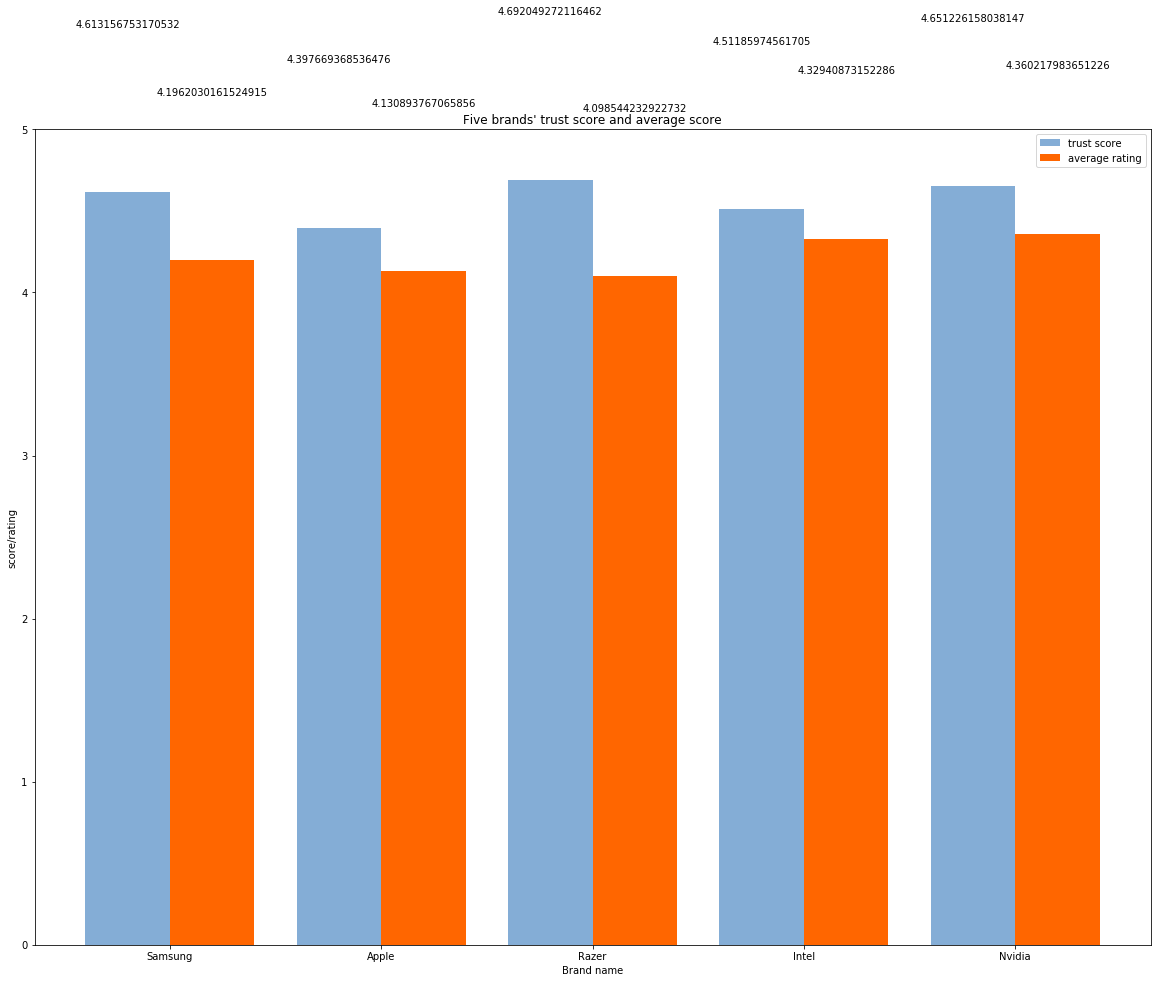

In [151]:
plt.figure(figsize=(20,15))

list_label = [samsung_trust_result[0], \
              apple_trust_result[0], \
              razer_trust_result[0], \
              intel_trust_result[0], \
              nvidia_trust_result[0]]

list_trust = [samsung_trust_result[1], \
              apple_trust_result[1], \
              razer_trust_result[1], \
              intel_trust_result[1], \
              nvidia_trust_result[1]]

list_avr_rating = [samsung_trust_result[2], \
              apple_trust_result[2], \
              razer_trust_result[2], \
              intel_trust_result[2], \
              nvidia_trust_result[2]]

x = range(len(list_label))

rects1 = plt.bar(x=x, height=list_trust, width=0.4, alpha=0.8, color='#6699CC', label="trust score")
rects2 = plt.bar(x=[i + 0.4 for i in x], height=list_avr_rating, width=0.4, color='#FF6600', label="average rating")
plt.ylim(0, 5)
plt.ylabel("score/rating")

plt.xticks([index + 0.2 for index in x], list_label)
plt.xlabel("Brand name")
plt.title("Five brands' trust score and average score")
plt.legend()

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.show()

In [144]:
def draw_pie(brand_name, int_incon, int_con):
    plt.figure(figsize=(20,5))
    plt.title(brand_name)
    label_list = ["Inconsistent reviews", "Consistent reviews"]
    size = [int_incon, int_con]
    color = ["#FF3333", "#66FFCC"]
    explode = [0.05, 0]   # 各部分突出值
    patches, l_text, p_text = plt.pie(size, explode=explode, colors=color, labels=label_list, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
    plt.axis("equal")    # 设置横轴和纵轴大小相等，这样饼才是圆的
    plt.legend()
    plt.show()

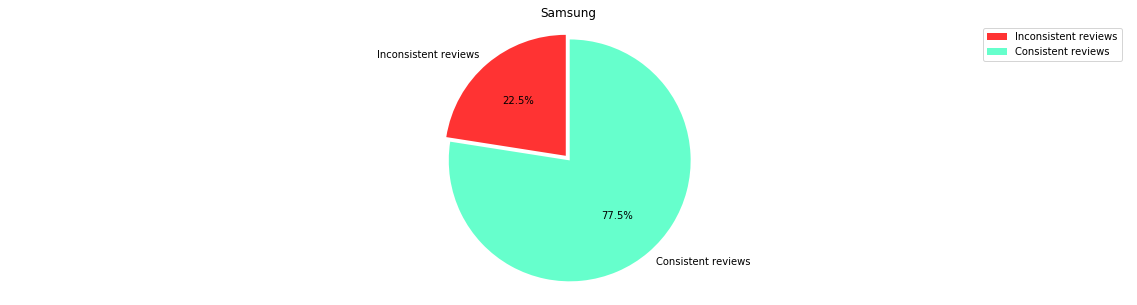

In [146]:
draw_pie('Samsung', int_samsung_incon_len, int_samsung_con_len)

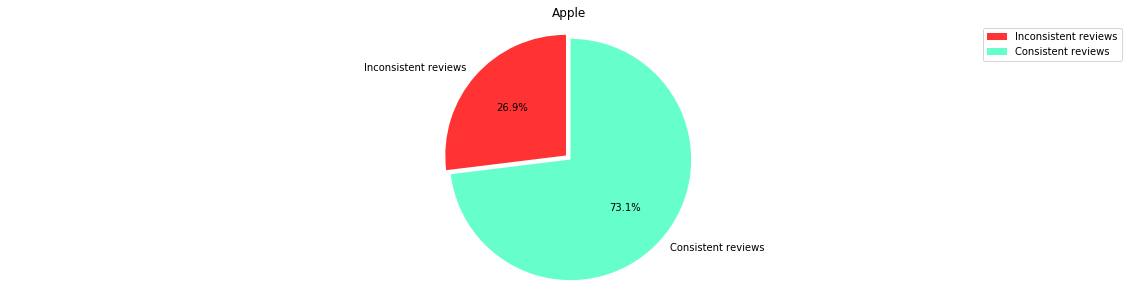

In [145]:
draw_pie('Apple', int_apple_incon_len, int_apple_con_len)

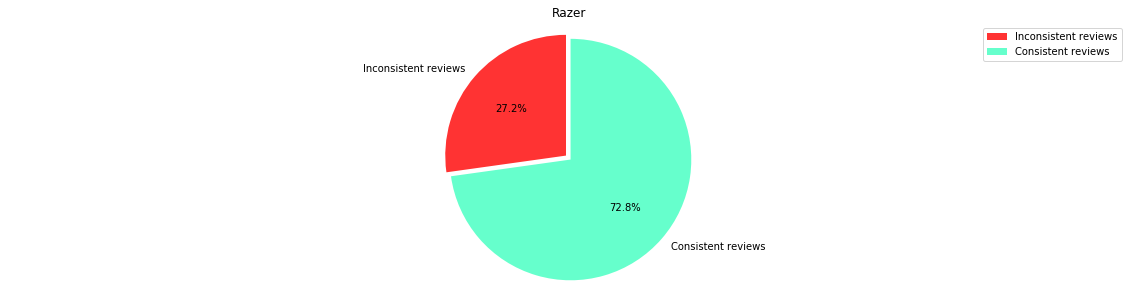

In [147]:
draw_pie('Razer', int_razer_incon_len, int_razer_con_len)

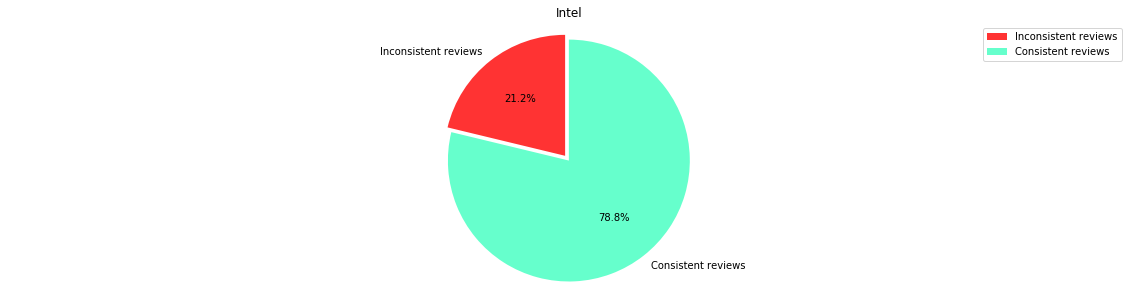

In [148]:
draw_pie('Intel', int_intel_incon_len, int_intel_con_len)

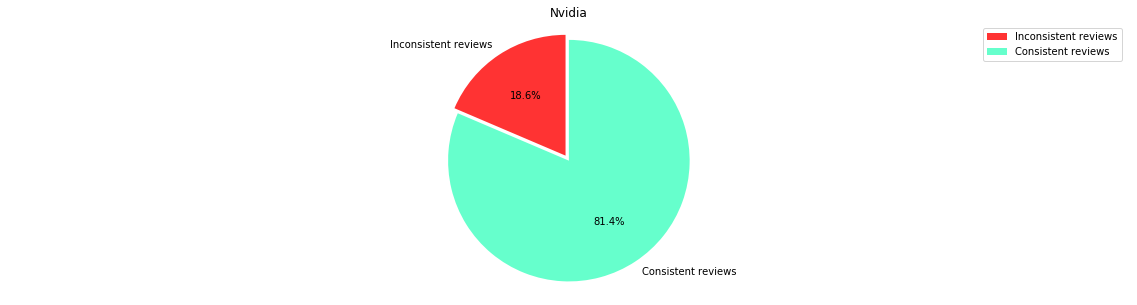

In [149]:
draw_pie('Nvidia', int_nvidia_incon_len, int_nvidia_con_len)

##### From above information, Nvidia's trust score is 4.65 and average rating is 4.36. The ratio of inconsistent reviews and consistent reviews are 18.6% and 81.4%. Obviously, Nvidia has the best trust level from both the trust score, average rating and the ratio of inconsistent and consistent reviews. And from above information, Apple and Razer may has worse trust level compare to the other brands.